# Named Entity Recognition (NER)
It is technique used to extract the information from text data and assigning the named entities in text to predefined and custom categories like person, location, organizations etc. It has many usecases and applications like recommendation engine, in the resume selection, text categorization and summarization.
In this assessment I used machine learning and deep learning models to implement named entity recognition. This notebook has code for both LSTM and Perceptron algorithms

# Exploratory Data Analysis:
Data Analysis is performed using the various data exploration, preprocessing and visualization techniques. I counted the unique values of each label and found that words are higly tagged to "O" label. From the bar graph we can observe that O values are relatively higher than the other categories like person, location etc. When we are training a model with more samples of O it might not predict well for the other categories. So we used word embedding and other preprocessing techniques to overcome this problem.

### Data Preprocessing: 
I grouped the words based on sentences by creating a column in the given train and test dataset. As it takes more time to run sentences with more words I tood word limit for each sentence and trained the model to improve accuracy. Each sentence is maintained same number of words to reduce word imbalance. Words to vectors and embedding are used to convert words into vectors. 


###  Solutions:
Implemented the NER for several models and picked top performing models. Primarily focused on data preprocessing, analysis and training of LSTM and Perceptron for NER problem

### SGD, Naive Bayes :
Initially I used simple linear classifiers to run in my local machine. Model is treated as multi label classifier and it should be able to classify all the labels based on words and context. Using SGD and Naive Bayes algorithms I got around 35-40% preciosn. The data is splitted into train and test data and performed predictions on provided test sample.

### Perceptron: 
The data is preprocessed by converting words to vectors using dictvectors and unique classes are taken into consideration. I trained the model for 20 epochs and it took 10-15 minutes training the model for all words. At the end of training for 20 epoch I got overall loss of 0.019 and it performed well for "o" class. I evaluated the model using F1SCORE, Precision and recall. I got 0.45 precision

### Word Embedding :
It is very important in NLP problems to convert the words to vectors. ElmoEmbeddings is used during the training of LSTM layer. This embeddings is based on three key features Context, deep and character. Each word is represented based on the context of entire text and is related to all deep pretrained networks data. Morphological clues to form robust representations for out-of-vocabulary tokens unseen in training.
### Bidirectional LSTM : 
Bidirectional LSTM is used to consider feed forward and back flow of words. LSTM performed better than above models. I trained the LSTM model for three epochs and with batch size of 32. 2000 sentences are used for training the model and 30% for validation and remaining for test data. Model is evaluated by performing the standard metrics. I got 52 F1 score and 60 %  precision. Training accuracy was almost equal to 98% with loss of 0.04

## Evaluation
I used F1 score, precision, recall metrics to evaluate the models. Precision and recall are very important to know how correctly model classifies each work. The metrics is calculated seperately for each label. I also used confdence scores to predict the probablity of each prediction value. When compared to other models LSTM performed better because of training and embeddings. 
### Bonus Points:
Implemented the NER using different models and evaluated with key metrics F1 score, precision, loss and recall.
I predicted the class probabilities of each entity. It can be seen under the last cell under LSTM prediction.

In [ ]:
#### importing pandas
import pandas as pd
import numpy as np
#loading train data from txt file and assigning column names
data=pd.read_csv("./Wnut17 NER/train.txt", delimiter="\t", header=None, names=["Word","Tag"])
data.head(10)
data_count= data["Tag"].value_counts()

In [188]:
#counting the number of labels and unique items in each particualr label
data_count.unique
data_count

O                  53003
B-person             566
B-location           494
I-person             288
B-group              230
I-location           226
B-corporation        196
I-product            163
I-creative-work      150
I-group              132
B-product            130
B-creative-work      110
I-corporation         43
Name: Tag, dtype: int64

### Data Analysis and exploration

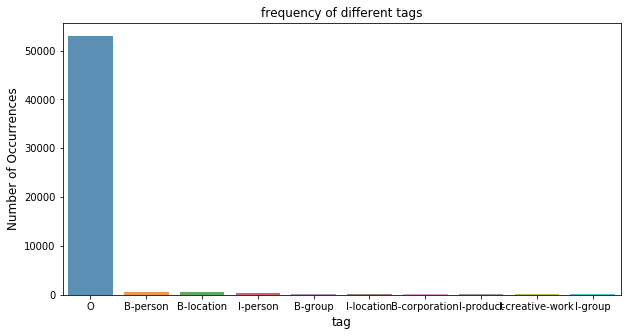

In [181]:

import seaborn as sns
data_count = data_count[:10,]
plt.figure(figsize=(10,5))
sns.barplot(data_count.index, data_count.values, alpha=0.8)
plt.title('frequency of different tags')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('tag', fontsize=12)
plt.show()

Text(0, 0.5, 'Number of occurences')

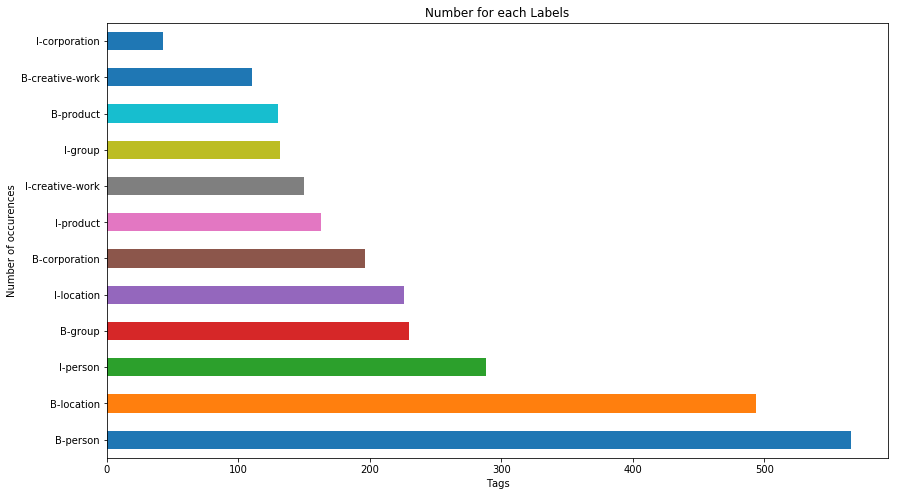

In [190]:
ax = data[data['Tag']!='O']['Tag'].value_counts().plot(kind='barh',
                                    figsize=(14,8),
                                    title="Number for each Labels")
ax.set_xlabel("Tags")
ax.set_ylabel("Number of occurences")

### Function to form sentence based on new line in train and text data

In [171]:
def isNaN(num):
    return num != num

count =1

def sentence_number(row):
    global count
    sentence = 'Sentence: ' + str(count)
    if isNaN(row['Word']) and isNaN(row['Tag']):
        count += 1
    return sentence

data["Sentence #"] = data.apply(sentence_number, axis=1)
data = data.dropna()
data.head(10)

,Word,Tag,Sentence #
0,@paulwalk,O,Sentence: 1
1,It,O,Sentence: 1
2,'s,O,Sentence: 1
3,the,O,Sentence: 1
4,view,O,Sentence: 1
5,from,O,Sentence: 1
6,where,O,Sentence: 1
7,I,O,Sentence: 1
8,'m,O,Sentence: 1
9,living,O,Sentence: 1


In [177]:
data["Word"][1]

'It'

In [166]:
from spacy import displacy
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()

In [178]:
displacy.render(nlp(str(data["Word"])), jupyter=True, style='ent')

In [183]:
displacy.render(nlp(str(data["Word"].head(5))), style='dep', jupyter = True, options = {'distance': 120})

In [208]:
data.tail(12)
y = data.Tag.values
#classes = np.unique(y)
classes = list(set(y))
print(classes)

[nan, 'I-product', 'B-creative-work', 'I-corporation', 'I-location', 'O', 'B-corporation', 'I-person', 'B-group', 'B-person', 'I-group', 'B-product', 'I-creative-work', 'B-location']


In [90]:
import csv
data_test = pd.read_csv("./Wnut17 NER/test.txt", header = None, quoting=csv.QUOTE_NONE, encoding='utf-8',names=["Word"])
def isNaN(num):
    return num != num

count =1

def sentence_number(row):
    global count
    sentence = 'Sentence: ' + str(count)
    if isNaN(row['Word']):
        count += 1
    return sentence

data_test["Sentence #"] = data_test.apply(sentence_number, axis=1)
data_test = data_test.dropna()
data_test.head(10)

,Word,Sentence #
0,&,Sentence: 1
1,gt,Sentence: 1
2,;,Sentence: 1
3,*,Sentence: 1
4,The,Sentence: 1
5,soldier,Sentence: 1
6,was,Sentence: 1
7,killed,Sentence: 1
8,when,Sentence: 1
9,another,Sentence: 1


In [91]:
data_test.tail(12)

,Word,Sentence #
23381,my,Sentence: 455
23382,school,Sentence: 455
23383,fault,Sentence: 455
23385,girl,Sentence: 456
23386,they,Sentence: 456
23387,cutting,Sentence: 456
23388,up,Sentence: 456
23389,with,Sentence: 456
23390,this,Sentence: 456
23391,dress,Sentence: 456


## Methods

### 1. Converting words in each sentence to list of words

In [5]:

class SentenceGetter(object):
    
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [94]:
words_test = set(list(data_test['Word'].values))
words_test.add('PADword')
n_words = len(words_test)
words2index = {w:i for i,w in enumerate(words_test)}

In [6]:
words = set(list(data['Word'].values))
words.add('PADword')
n_words = len(words)
n_words

13795

In [7]:
tags = list(set(data["Tag"].values))
n_tags = len(tags)
n_tags

13

In [8]:
getter = SentenceGetter(data)
sent = getter.get_next()
print(sent)

[('@paulwalk', 'O'), ('It', 'O'), ("'s", 'O'), ('the', 'O'), ('view', 'O'), ('from', 'O'), ('where', 'O'), ('I', 'O'), ("'m", 'O'), ('living', 'O'), ('for', 'O'), ('two', 'O'), ('weeks', 'O'), ('.', 'O'), ('Empire', 'B-location'), ('State', 'I-location'), ('Building', 'I-location'), ('=', 'O'), ('ESB', 'B-location'), ('.', 'O'), ('Pretty', 'O'), ('bad', 'O'), ('storm', 'O'), ('here', 'O'), ('last', 'O'), ('evening', 'O'), ('.', 'O')]


In [9]:
sentences = getter.sentences
print(len(sentences))

2163


In [10]:
largest_sen = max(len(sen) for sen in sentences)
print('biggest sentence has {} words'.format(largest_sen))

biggest sentence has 14395 words


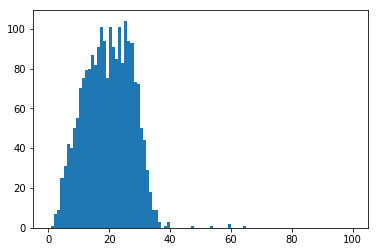

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist([len(sen) for sen in sentences], bins= 100, range=(0, 100))
plt.show()

In [12]:
words2index = {w:i for i,w in enumerate(words)}
tags2index = {t:i for i,t in enumerate(tags)}
print(words2index['Empire'])
print(tags2index['B-location'])

4264
12


In [13]:
max_len = 50
X = [[w[0]for w in s] for s in sentences]
new_X = []
for seq in X:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    new_X.append(new_seq)
new_X[15]

['I',
 'think',
 'that',
 'today',
 'the',
 'party',
 'has',
 'been',
 'canceled',
 'makes',
 'too',
 'much',
 'air',
 'in',
 'the',
 'street',
 'loll',
 '.',
 'miss',
 'u',
 'twitfriends',
 '.',
 'xx',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword',
 'PADword']

In [179]:
displacy.render(nlp(str(new_X[15])), jupyter=True, style='ent')

### 2. LSTM network of NER

In [14]:
from keras.preprocessing.sequence import pad_sequences
y = [[tags2index[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tags2index["O"])
y[15]

Using TensorFlow backend.


array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4], dtype=int32)

In [15]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(new_X, y, test_size=0.1, random_state=2018)
len(X_tr)

1946

In [16]:
batch_size = 32
import tensorflow as tf
import tensorflow_hub as hub
from keras import backend as K
sess = tf.Session()
K.set_session(sess)

### Word Embeddings

In [17]:
elmo_model = hub.Module("https://tfhub.dev/google/elmo/3", trainable=True)
sess.run(tf.global_variables_initializer())
sess.run(tf.tables_initializer())

In [18]:
def ElmoEmbedding(x):
    return elmo_model(inputs={
                            "tokens": tf.squeeze(tf.cast(x, tf.string)),
                            "sequence_len": tf.constant(batch_size*[max_len])
                      },
                      signature="tokens",
                      as_dict=True)["elmo"]

In [19]:
from keras.models import Model, Input
from keras.layers.merge import add
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional, Lambda

In [20]:
input_text = Input(shape=(max_len,), dtype=tf.string)
embedding = Lambda(ElmoEmbedding, output_shape=(max_len, 1024))(input_text)
x = Bidirectional(LSTM(units=512, return_sequences=True,
                       recurrent_dropout=0.2, dropout=0.2))(embedding)
x_rnn = Bidirectional(LSTM(units=512, return_sequences=True,
                           recurrent_dropout=0.2, dropout=0.2))(x)
x = add([x, x_rnn]) 
out = TimeDistributed(Dense(n_tags, activation="softmax"))(x)

In [21]:
model = Model(input_text, out)
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [22]:
X_tr, X_val = X_tr[:45*batch_size], X_tr[-15*batch_size:]
y_tr, y_val = y_tr[:45*batch_size], y_tr[-15*batch_size:]
y_tr = y_tr.reshape(y_tr.shape[0], y_tr.shape[1], 1)
y_val = y_val.reshape(y_val.shape[0], y_val.shape[1], 1)

#### Training bidirectional LSTM network for the dataset provided

In [23]:
history = model.fit(
    np.array(X_tr), y_tr, validation_data=(np.array(X_val), y_val),
                    batch_size=batch_size, epochs=3, verbose=1)

W1206 11:55:04.014816 4512900544 deprecation.py:323] From /Users/sravyaadiraj/Library/Python/3.7/lib/python/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W1206 11:55:06.698889 4512900544 deprecation_wrapper.py:119] From /Users/sravyaadiraj/Library/Python/3.7/lib/python/site-packages/keras/backend/tensorflow_backend.py:422: The name tf.global_variables is deprecated. Please use tf.compat.v1.global_variables instead.

W1206 11:55:06.699874 4512900544 deprecation_wrapper.py:119] From /Users/sravyaadiraj/Library/Python/3.7/lib/python/site-packages/keras/backend/tensorflow_backend.py:431: The name tf.is_variable_initialized is deprecated. Please use tf.compat.v1.is_variable_initialized instead.



Train on 1440 samples, validate on 480 samples
Epoch 1/3
1440/1440 [==============================] - 399s 277ms/step - loss: 0.1524 - accuracy: 0.9644 - val_loss: 0.0659 - val_accuracy: 0.9841
Epoch 2/3
1440/1440 [==============================] - 448s 311ms/step - loss: 0.0547 - accuracy: 0.9871 - val_loss: 0.0540 - val_accuracy: 0.9872
Epoch 3/3
1440/1440 [==============================] - 440s 305ms/step - loss: 0.0417 - accuracy: 0.9894 - val_loss: 0.0484 - val_accuracy: 0.9878


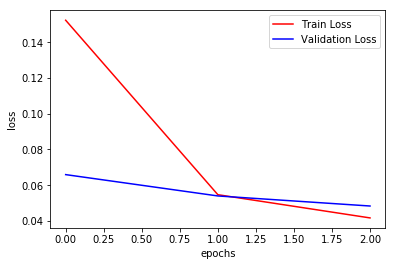

In [32]:
train_loss = history.history["loss"]
val_loss = history.history["val_loss"]
plt.plot(range(len(train_loss)), train_loss, color="red", label="Train Loss")
plt.plot(range(len(train_loss)), val_loss, color="blue", label="Validation Loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(loc="best")
plt.show()

In [114]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report
X_te = X_te[:6*batch_size]
X_te
test_pred = model.predict(np.array(X_te), verbose=1)

192/192 [==============================] - 23s 121ms/step


In [118]:
len(X_te[0])

50

In [33]:
idx2tag = {i: w for w, i in tags2index.items()}

def pred2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            p_i = np.argmax(p)
            out_i.append(idx2tag[p_i].replace("PADword", "O"))
        out.append(out_i)
    return out

def test2label(pred):
    out = []
    for pred_i in pred:
        out_i = []
        for p in pred_i:
            out_i.append(idx2tag[p].replace("PADword", "O"))
        out.append(out_i)
    return out
    
pred_labels = pred2label(test_pred)
test_labels = test2label(y_te[:6*batch_size])

In [34]:
print("F1-score: {:.1%}".format(f1_score(test_labels, pred_labels)))

F1-score: 54.9%


### Evaluating the performance of model

In [35]:
print(classification_report(test_labels, pred_labels))


             precision    recall  f1-score   support

corporation       0.67      0.59      0.62        17
     person       0.64      0.67      0.66        43
    product       0.50      0.09      0.15        11
      group       0.33      0.33      0.33         9
   location       0.59      0.52      0.55        31
       work       0.00      0.00      0.00         6

  micro avg       0.60      0.50      0.55       117
  macro avg       0.56      0.50      0.52       117



## LSTM predictions for the provided "test.txt" file

In [100]:

#preprocessing the text data for predictions
agg_func = lambda s: [w for w in s["Word"].values.tolist()]
grouped = data_test.groupby("Sentence #").apply(agg_func)

prediction_word_list = [s for s in grouped]

prediction_word_list

[['&',
  'gt',
  ';',
  '*',
  'The',
  'soldier',
  'was',
  'killed',
  'when',
  'another',
  'avalanche',
  'hit',
  'an',
  'army',
  'barracks',
  'in',
  'the',
  'northern',
  'area',
  'of',
  'Sonmarg'],
 ['the', 'government', 'said', 'on', 'Friday', '.', '“', 'Presently'],
 ['Electric',
  'field',
  'is',
  'nonconservative',
  'when',
  'magnetic',
  'field',
  'is',
  'changing',
  'and',
  'you',
  'cannot',
  'apply',
  'Kirchhoff',
  "'",
  's',
  'law',
  'then',
  '.',
  'Looking',
  'up',
  'touchscreen',
  'history',
  '-',
  'found',
  'this',
  '1981',
  'computer',
  'that',
  'used',
  'Infrared',
  'to',
  'detect',
  'finger',
  'movement',
  '.',
  'Clearly',
  'Star',
  'Trek',
  'was',
  'an',
  'inspiration',
  '.',
  'https://en.wikipedia.org/wiki/Touchscreen#/media/File:Platovterm1981.jpg',
  'I',
  "'",
  'm',
  'referring',
  'to',
  'the',
  'ones',
  'newly',
  'introduced',
  'in',
  'Rogue',
  'One',
  '-',
  'I',
  'ca',
  'n',
  "'",
  't',
  're

In [132]:
max_len = 50
tst = [s for s in prediction_word_list]
tst
pred_X = []
for seq in tst:
    new_seq = []
    for i in range(max_len):
        try:
            new_seq.append(seq[i])
        except:
            new_seq.append("PADword")
    pred_X.append(new_seq)




len(pred_X)
# pred_X.shape

456

In [138]:
pred_X = pred_X[:14*batch_size]
len(pred_X), len(pred_X[0])



(448, 50)

In [139]:
lstm_result = model.predict(np.array(pred_X), verbose=1)

448/448 [==============================] - 107s 238ms/step


In [140]:
pred_labels = pred2label(lstm_result)

### Bonus points
Prediction of classes and their confidence score  for all the words in "test.txt" file

In [209]:


for i, n in enumerate(pred_X):
#     print(n, pred_labels[i])
    for ix, w in enumerate(n):
        print(w,"  label: ",pred_labels[i][ix], "confidence score" ,max(lstm_result[i][ix]))

&   label:  O confidence score 0.992968
gt   label:  O confidence score 0.9979862
;   label:  O confidence score 0.9990953
*   label:  O confidence score 0.9988172
The   label:  O confidence score 0.9810635
soldier   label:  O confidence score 0.96928304
was   label:  O confidence score 0.9956359
killed   label:  O confidence score 0.9981237
when   label:  O confidence score 0.9992254
another   label:  O confidence score 0.9954383
avalanche   label:  O confidence score 0.97447795
hit   label:  O confidence score 0.99343324
an   label:  O confidence score 0.9507833
army   label:  O confidence score 0.68556625
barracks   label:  O confidence score 0.7808957
in   label:  O confidence score 0.9960471
the   label:  O confidence score 0.9293901
northern   label:  O confidence score 0.75099844
area   label:  O confidence score 0.90110844
of   label:  O confidence score 0.97853136
Sonmarg   label:  O confidence score 0.6722295
PADword   label:  O confidence score 0.99364203
PADword   label:  O

@   label:  O confidence score 0.99876463
SmedleyDSlap   label:  O confidence score 0.9224232
PADword   label:  O confidence score 0.99836856
PADword   label:  O confidence score 0.99960357
PADword   label:  O confidence score 0.9998266
PADword   label:  O confidence score 0.9999012
PADword   label:  O confidence score 0.9999374
PADword   label:  O confidence score 0.9999591
PADword   label:  O confidence score 0.99997246
PADword   label:  O confidence score 0.99998057
PADword   label:  O confidence score 0.9999856
PADword   label:  O confidence score 0.9999887
PADword   label:  O confidence score 0.9999906
PADword   label:  O confidence score 0.9999919
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.9999945
PADword   label:  O confidence score 0.9999945
PADword   label:  O confidence score 0.99999464
PADword   label:  O confidence score 0.99999464
PADwo

PADword   label:  O confidence score 0.995943
PADword   label:  O confidence score 0.99916184
PADword   label:  O confidence score 0.9996917
PADword   label:  O confidence score 0.9998386
PADword   label:  O confidence score 0.9999037
PADword   label:  O confidence score 0.9999385
PADword   label:  O confidence score 0.9999585
PADword   label:  O confidence score 0.9999708
PADword   label:  O confidence score 0.9999784
PADword   label:  O confidence score 0.9999833
PADword   label:  O confidence score 0.9999864
PADword   label:  O confidence score 0.9999881
PADword   label:  O confidence score 0.9999895
PADword   label:  O confidence score 0.99999034
PADword   label:  O confidence score 0.99999094
PADword   label:  O confidence score 0.9999913
PADword   label:  O confidence score 0.9999913
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.9999908
PADword   label:  O confidence score 0.99999034
PADword   label:  O confidence score 0.99998975
PADword  

PADword   label:  O confidence score 0.99991715
PADword   label:  O confidence score 0.9999416
PADword   label:  O confidence score 0.99995756
PADword   label:  O confidence score 0.9999683
PADword   label:  O confidence score 0.9999753
PADword   label:  O confidence score 0.99998033
PADword   label:  O confidence score 0.9999839
PADword   label:  O confidence score 0.99998665
PADword   label:  O confidence score 0.9999887
PADword   label:  O confidence score 0.99999034
PADword   label:  O confidence score 0.99999154
PADword   label:  O confidence score 0.9999924
PADword   label:  O confidence score 0.9999932
PADword   label:  O confidence score 0.9999938
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.99999464
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.9999951
PADword   label:  O confidence score 0.99999523
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.99999535
PAD

inequality   label:  O confidence score 0.99073726
is   label:  O confidence score 0.99924743
wrong   label:  O confidence score 0.99617755
PADword   label:  O confidence score 0.9944013
PADword   label:  O confidence score 0.9983918
PADword   label:  O confidence score 0.99933416
PADword   label:  O confidence score 0.9996549
PADword   label:  O confidence score 0.9998017
PADword   label:  O confidence score 0.99987507
PADword   label:  O confidence score 0.99991596
PADword   label:  O confidence score 0.99994063
PADword   label:  O confidence score 0.99995613
PADword   label:  O confidence score 0.9999664
PADword   label:  O confidence score 0.9999733
PADword   label:  O confidence score 0.9999776
PADword   label:  O confidence score 0.9999807
PADword   label:  O confidence score 0.99998283
PADword   label:  O confidence score 0.99998426
PADword   label:  O confidence score 0.99998534
PADword   label:  O confidence score 0.9999858
PADword   label:  O confidence score 0.9999864
PADwor

the   label:  O confidence score 0.93006957
CoS   label:  O confidence score 0.6103115
game   label:  O confidence score 0.9462664
]   label:  O confidence score 0.9836505
(   label:  O confidence score 0.99606305
http://i.imgur.com/LhhRTyG.jpg   label:  O confidence score 0.9841451
)   label:  O confidence score 0.99717796
(   label:  O confidence score 0.99854183
which   label:  O confidence score 0.9966233
has   label:  O confidence score 0.9978315
been   label:  O confidence score 0.99825996
[   label:  O confidence score 0.9969619
confirmed   label:  O confidence score 0.9950885
to   label:  O confidence score 0.99599224
be   label:  O confidence score 0.99424464
written   label:  O confidence score 0.987194
by   label:  O confidence score 0.9804844
Jo   label:  B-person confidence score 0.9273902
]   label:  O confidence score 0.7771177
(   label:  O confidence score 0.99286944
http://web.archive.org/web/20100310145702/   label:  O confidence score 0.98660266
http://www.jkrowling

^   label:  O confidence score 0.99913186
the   label:  O confidence score 0.9987109
^   label:  O confidence score 0.9990563
article   label:  O confidence score 0.9989791
'   label:  O confidence score 0.9990484
s   label:  O confidence score 0.99838066
^   label:  O confidence score 0.99881727
text   label:  O confidence score 0.99792504
^   label:  O confidence score 0.99958915
as   label:  O confidence score 0.9998017
^   label:  O confidence score 0.9994747
a   label:  O confidence score 0.9996251
^   label:  O confidence score 0.99973375
comment   label:  O confidence score 0.9997979
^   label:  O confidence score 0.99944514
if   label:  O confidence score 0.99954337
^   label:  O confidence score 0.998384
the   label:  O confidence score 0.9965262
^   label:  O confidence score 0.9989975
website   label:  O confidence score 0.9957594
^   label:  O confidence score 0.99811685
is   label:  O confidence score 0.9991972
^   label:  O confidence score 0.9972945
adblocker   label:  O

bad   label:  O confidence score 0.997884
decision   label:  O confidence score 0.99816567
?   label:  O confidence score 0.9998567
I   label:  O confidence score 0.99960214
still   label:  O confidence score 0.9997851
think   label:  O confidence score 0.9998062
that   label:  O confidence score 0.999121
with   label:  O confidence score 0.99931836
more   label:  O confidence score 0.9992023
details   label:  O confidence score 0.99877864
from   label:  O confidence score 0.99944454
your   label:  O confidence score 0.9993311
actual   label:  O confidence score 0.99848783
proof   label:  O confidence score 0.99810034
PADword   label:  O confidence score 0.99721164
PADword   label:  O confidence score 0.99926645
PADword   label:  O confidence score 0.9996513
PADword   label:  O confidence score 0.99980026
PADword   label:  O confidence score 0.9998734
PADword   label:  O confidence score 0.9999125
PADword   label:  O confidence score 0.99993527
PADword   label:  O confidence score 0.99

PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.9999938
PADword   label:  O confidence score 0.9999939
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.99999416
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.9999944
PADword   label:  O confidence score 0.99999416
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.99999356
PADword   label:  O confidence score 0.9999932
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.99999225
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.99999034
PADword   label:  O confidence score 0.9999893
PADword   label:  O confidence score 0.99998796
PADword   label:  O confidence score 0.9999862
PADword   label:  O confidence score 0.9999838
PAD

PADword   label:  O confidence score 0.99993145
PADword   label:  O confidence score 0.9999503
PADword   label:  O confidence score 0.9999627
PADword   label:  O confidence score 0.9999708
PADword   label:  O confidence score 0.9999765
PADword   label:  O confidence score 0.9999802
PADword   label:  O confidence score 0.9999831
PADword   label:  O confidence score 0.99998534
PADword   label:  O confidence score 0.999987
PADword   label:  O confidence score 0.9999882
PADword   label:  O confidence score 0.9999893
PADword   label:  O confidence score 0.9999901
PADword   label:  O confidence score 0.9999908
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.9999918
PADword   label:  O confidence score 0.99999213
PADword   label:  O confidence score 0.9999926
PADword   label:  O confidence score 0.9999926
PADword   label:  O confidence score 0.99999297
PADword   label:  O confidence score 0.99999297
PADword   label:  O confidence score 0.9999927
PADword  

PADword   label:  O confidence score 0.9998441
PADword   label:  O confidence score 0.99926
'   label:  O confidence score 0.997384
I   label:  O confidence score 0.99801993
do   label:  O confidence score 0.9990765
n   label:  O confidence score 0.9989207
'   label:  O confidence score 0.9987639
t   label:  O confidence score 0.99920386
want   label:  O confidence score 0.9986143
any   label:  O confidence score 0.99490756
Carrow   label:  O confidence score 0.35245326
supporters   label:  O confidence score 0.90993243
to   label:  O confidence score 0.9944041
be   label:  O confidence score 0.9946725
able   label:  O confidence score 0.9900227
to   label:  O confidence score 0.99740463
get   label:  O confidence score 0.9975581
in   label:  O confidence score 0.98485154
'   label:  O confidence score 0.9936219
-   label:  O confidence score 0.9983005
and   label:  O confidence score 0.9977602
'   label:  O confidence score 0.9979372
ll   label:  O confidence score 0.9976164
do   labe

?   label:  O confidence score 0.9994117
?   label:  O confidence score 0.99922085
Where   label:  O confidence score 0.9976616
was   label:  O confidence score 0.9965496
the   label:  O confidence score 0.98552775
planet   label:  O confidence score 0.9186121
inhabited   label:  O confidence score 0.9885151
by   label:  O confidence score 0.9966376
"   label:  O confidence score 0.9819344
the   label:  O confidence score 0.86231285
Giants   label:  I-group confidence score 0.19345266
"   label:  O confidence score 0.9480591
located   label:  O confidence score 0.9920723
relative   label:  O confidence score 0.9966853
to   label:  O confidence score 0.9933201
Earth   label:  O confidence score 0.55574566
?   label:  O confidence score 0.99885297
Why   label:  O confidence score 0.99908817
is   label:  O confidence score 0.99873155
the   label:  O confidence score 0.99355304
perpendicular   label:  O confidence score 0.99457586
part   label:  O confidence score 0.99464273
a   label:  O 

top   label:  O confidence score 0.99403507
comment   label:  O confidence score 0.9993087
.   label:  O confidence score 0.99950695
https://www.reddit.com/r/soccer/comments/5nhf8x/walter_smithmessi_was_right_we_did_play/dcbjevx/?context=3onthecontrarytrueMadridistasloveme.😢CryMessifanboy   label:  O confidence score 0.99603146
It   label:  O confidence score 0.99614775
'   label:  O confidence score 0.99841213
s   label:  O confidence score 0.9992306
actually   label:  O confidence score 0.9991659
copypasta   label:  O confidence score 0.94272995
from   label:  O confidence score 0.9983145
a   label:  O confidence score 0.99776375
post   label:  O confidence score 0.99772257
I   label:  O confidence score 0.9974584
did   label:  O confidence score 0.99923575
a   label:  O confidence score 0.9987658
couple   label:  O confidence score 0.99658245
April   label:  O confidence score 0.9741701
fools   label:  O confidence score 0.9632364
ago   label:  O confidence score 0.99512345
when   l

PADword   label:  O confidence score 0.99976844
PADword   label:  O confidence score 0.99986124
PADword   label:  O confidence score 0.99990976
PADword   label:  O confidence score 0.9999378
PADword   label:  O confidence score 0.9999552
PADword   label:  O confidence score 0.9999664
PADword   label:  O confidence score 0.9999739
PADword   label:  O confidence score 0.9999788
PADword   label:  O confidence score 0.99998224
PADword   label:  O confidence score 0.99998474
PADword   label:  O confidence score 0.9999865
PADword   label:  O confidence score 0.99998796
PADword   label:  O confidence score 0.99998903
PADword   label:  O confidence score 0.99998987
PADword   label:  O confidence score 0.9999906
PADword   label:  O confidence score 0.99999094
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.9999919
PADword   label:  O confidence score 0.9999919
PADword   label:  O confidence score 0.99999213
PADword   label:  O confidence score 0.99999213
PA

PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.99999523
PADword   label:  O confidence score 0.99999547
PADword   label:  O confidence score 0.99999547
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.9999951
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.9999945
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.9999926
PADword   label:  O confidence score 0.9999918
PADword   label:  O confidence score 0.9999906
PADwor

explain   label:  O confidence score 0.99828583
what   label:  O confidence score 0.9985518
is   label:  O confidence score 0.9973883
was   label:  O confidence score 0.99788815
he   label:  O confidence score 0.99278307
actually   label:  O confidence score 0.9972053
saw   label:  O confidence score 0.99797684
?   label:  O confidence score 0.9996238
I   label:  O confidence score 0.99926287
wish   label:  O confidence score 0.9997099
they   label:  O confidence score 0.99757475
'   label:  O confidence score 0.9977149
d   label:  O confidence score 0.9912982
spend   label:  O confidence score 0.9968851
research   label:  O confidence score 0.9930949
efforts   label:  O confidence score 0.99687284
on   label:  O confidence score 0.9965933
how   label:  O confidence score 0.99816173
to   label:  O confidence score 0.9956167
get   label:  O confidence score 0.9829525
more   label:  O confidence score 0.877812
I   label:  O confidence score 0.9992384
really   label:  O confidence score 0

after   label:  O confidence score 0.9997291
he   label:  O confidence score 0.9894075
caught   label:  O confidence score 0.9913059
a   label:  O confidence score 0.98521763
bullet   label:  O confidence score 0.96736574
with   label:  O confidence score 0.99726844
a   label:  O confidence score 0.99222434
bat   label:  O confidence score 0.9806384
PADword   label:  O confidence score 0.9973349
PADword   label:  O confidence score 0.99935275
PADword   label:  O confidence score 0.999723
PADword   label:  O confidence score 0.99984264
PADword   label:  O confidence score 0.99989927
PADword   label:  O confidence score 0.9999312
PADword   label:  O confidence score 0.9999505
PADword   label:  O confidence score 0.9999629
PADword   label:  O confidence score 0.9999709
PADword   label:  O confidence score 0.9999759
PADword   label:  O confidence score 0.99997926
PADword   label:  O confidence score 0.99998116
PADword   label:  O confidence score 0.9999826
PADword   label:  O confidence sc

PADword   label:  O confidence score 0.9998233
dark   label:  O confidence score 0.9733496
and   label:  O confidence score 0.9926771
cruel   label:  O confidence score 0.9921216
PADword   label:  O confidence score 0.99890924
PADword   label:  O confidence score 0.99960214
PADword   label:  O confidence score 0.9997899
PADword   label:  O confidence score 0.9998648
PADword   label:  O confidence score 0.99990857
PADword   label:  O confidence score 0.999936
PADword   label:  O confidence score 0.99995375
PADword   label:  O confidence score 0.9999651
PADword   label:  O confidence score 0.9999726
PADword   label:  O confidence score 0.9999777
PADword   label:  O confidence score 0.9999813
PADword   label:  O confidence score 0.9999838
PADword   label:  O confidence score 0.99998593
PADword   label:  O confidence score 0.9999875
PADword   label:  O confidence score 0.9999888
PADword   label:  O confidence score 0.99998987
PADword   label:  O confidence score 0.9999906
PADword   label: 

PADword   label:  O confidence score 0.99884355
PADword   label:  O confidence score 0.99958557
PADword   label:  O confidence score 0.99978536
PADword   label:  O confidence score 0.99987125
PADword   label:  O confidence score 0.9999174
PADword   label:  O confidence score 0.99994516
PADword   label:  O confidence score 0.999962
PADword   label:  O confidence score 0.9999726
PADword   label:  O confidence score 0.9999795
PADword   label:  O confidence score 0.99998367
PADword   label:  O confidence score 0.9999864
PADword   label:  O confidence score 0.9999883
PADword   label:  O confidence score 0.99998975
PADword   label:  O confidence score 0.9999907
PADword   label:  O confidence score 0.99999154
PADword   label:  O confidence score 0.999992
PADword   label:  O confidence score 0.9999925
PADword   label:  O confidence score 0.99999297
PADword   label:  O confidence score 0.9999932
PADword   label:  O confidence score 0.9999932
PADword   label:  O confidence score 0.9999932
PADwor

Costello   label:  O confidence score 0.48690438
sold   label:  O confidence score 0.99708134
them   label:  O confidence score 0.9942748
off   label:  O confidence score 0.9933329
etc   label:  O confidence score 0.99466187
PADword   label:  O confidence score 0.99681026
PADword   label:  O confidence score 0.9991366
PADword   label:  O confidence score 0.99967647
PADword   label:  O confidence score 0.9998325
PADword   label:  O confidence score 0.9998996
PADword   label:  O confidence score 0.9999337
PADword   label:  O confidence score 0.99995303
PADword   label:  O confidence score 0.9999651
PADword   label:  O confidence score 0.99997306
PADword   label:  O confidence score 0.9999782
PADword   label:  O confidence score 0.9999815
PADword   label:  O confidence score 0.9999838
PADword   label:  O confidence score 0.99998534
PADword   label:  O confidence score 0.9999864
PADword   label:  O confidence score 0.9999871
PADword   label:  O confidence score 0.9999876
PADword   label:  

subject   label:  O confidence score 0.9992455
to   label:  O confidence score 0.99712914
some   label:  O confidence score 0.997009
constraints   label:  O confidence score 0.9967219
PADword   label:  O confidence score 0.99810636
PADword   label:  O confidence score 0.9995809
PADword   label:  O confidence score 0.9998185
PADword   label:  O confidence score 0.99990416
PADword   label:  O confidence score 0.99994123
PADword   label:  O confidence score 0.999961
PADword   label:  O confidence score 0.9999726
PADword   label:  O confidence score 0.99997973
PADword   label:  O confidence score 0.999984
PADword   label:  O confidence score 0.99998677
PADword   label:  O confidence score 0.9999889
PADword   label:  O confidence score 0.9999901
PADword   label:  O confidence score 0.9999912
PADword   label:  O confidence score 0.99999213
PADword   label:  O confidence score 0.9999926
PADword   label:  O confidence score 0.9999931
PADword   label:  O confidence score 0.9999932
PADword   lab

here   label:  O confidence score 0.9988714
.   label:  O confidence score 0.9997217
While   label:  O confidence score 0.9988727
exploding   label:  O confidence score 0.9780521
bombs   label:  O confidence score 0.9841106
or   label:  O confidence score 0.9898948
freezing   label:  O confidence score 0.86270654
molecules   label:  O confidence score 0.9795806
always   label:  O confidence score 0.99914
follow   label:  O confidence score 0.99920565
certain   label:  O confidence score 0.9992073
chemical   label:  O confidence score 0.9941052
and   label:  O confidence score 0.99573165
physical   label:  O confidence score 0.9943982
laws   label:  O confidence score 0.99811196
PADword   label:  O confidence score 0.99814785
PADword   label:  O confidence score 0.9994412
PADword   label:  O confidence score 0.9997676
PADword   label:  O confidence score 0.99987805
PADword   label:  O confidence score 0.99992394
PADword   label:  O confidence score 0.9999472
PADword   label:  O confiden

in   label:  O confidence score 0.99971133
the   label:  O confidence score 0.99892706
question   label:  O confidence score 0.9997789
.   label:  O confidence score 0.9998398
Could   label:  O confidence score 0.99940825
you   label:  O confidence score 0.9993432
give   label:  O confidence score 0.9994024
details   label:  O confidence score 0.9992207
?   label:  O confidence score 0.9998018
Also   label:  O confidence score 0.99920565
PADword   label:  O confidence score 0.99819726
PADword   label:  O confidence score 0.9995684
PADword   label:  O confidence score 0.9997949
PADword   label:  O confidence score 0.99987924
PADword   label:  O confidence score 0.9999248
PADword   label:  O confidence score 0.9999511
PADword   label:  O confidence score 0.99996674
PADword   label:  O confidence score 0.9999764
PADword   label:  O confidence score 0.9999825
PADword   label:  O confidence score 0.99998605
PADword   label:  O confidence score 0.9999883
PADword   label:  O confidence score 

.   label:  O confidence score 0.9992902
That   label:  O confidence score 0.9966882
helps   label:  O confidence score 0.9988543
so   label:  O confidence score 0.9997161
much   label:  O confidence score 0.9993538
PADword   label:  O confidence score 0.9973985
PADword   label:  O confidence score 0.9992292
PADword   label:  O confidence score 0.99961853
PADword   label:  O confidence score 0.9997863
PADword   label:  O confidence score 0.9998673
PADword   label:  O confidence score 0.9999119
PADword   label:  O confidence score 0.999938
PADword   label:  O confidence score 0.99995434
PADword   label:  O confidence score 0.9999651
PADword   label:  O confidence score 0.9999722
PADword   label:  O confidence score 0.9999769
PADword   label:  O confidence score 0.99998
PADword   label:  O confidence score 0.999982
PADword   label:  O confidence score 0.99998367
PADword   label:  O confidence score 0.99998474
PADword   label:  O confidence score 0.9999856
PADword   label:  O confidence s

Concerns   label:  O confidence score 0.9890654
about   label:  O confidence score 0.99751246
Wick   label:  O confidence score 0.30941284
Rotations   label:  O confidence score 0.8522991
@   label:  O confidence score 0.99799144
Gallifreyan   label:  O confidence score 0.9011113
PADword   label:  O confidence score 0.9981993
PADword   label:  O confidence score 0.9995579
PADword   label:  O confidence score 0.99979895
PADword   label:  O confidence score 0.9998871
PADword   label:  O confidence score 0.99992776
PADword   label:  O confidence score 0.99995124
PADword   label:  O confidence score 0.9999665
PADword   label:  O confidence score 0.99997616
PADword   label:  O confidence score 0.9999825
PADword   label:  O confidence score 0.9999864
PADword   label:  O confidence score 0.9999889
PADword   label:  O confidence score 0.9999907
PADword   label:  O confidence score 0.999992
PADword   label:  O confidence score 0.99999285
PADword   label:  O confidence score 0.99999344
PADword  

if   label:  O confidence score 0.9998437
we   label:  O confidence score 0.99944717
'   label:  O confidence score 0.9997415
re   label:  O confidence score 0.9995956
being   label:  O confidence score 0.9991979
very   label:  O confidence score 0.9984073
generous   label:  O confidence score 0.9974113
)   label:  O confidence score 0.9993788
have   label:  O confidence score 0.9995382
been   label:  O confidence score 0.9993082
a   label:  O confidence score 0.9995047
mistake   label:  O confidence score 0.9983925
.   label:  O confidence score 0.9996419
But   label:  O confidence score 0.998892
by   label:  O confidence score 0.9996117
owning   label:  O confidence score 0.9962219
it   label:  O confidence score 0.9946913
as   label:  O confidence score 0.9996056
intentional   label:  O confidence score 0.99839646
and   label:  O confidence score 0.99942136
refusing   label:  O confidence score 0.9993436
to   label:  O confidence score 0.9994704
apologize   label:  O confidence scor

PADword   label:  O confidence score 0.9999672
PADword   label:  O confidence score 0.9999747
PADword   label:  O confidence score 0.99998
PADword   label:  O confidence score 0.9999833
PADword   label:  O confidence score 0.9999858
PADword   label:  O confidence score 0.9999876
PADword   label:  O confidence score 0.99998915
PADword   label:  O confidence score 0.9999902
PADword   label:  O confidence score 0.99999106
PADword   label:  O confidence score 0.9999919
PADword   label:  O confidence score 0.9999925
PADword   label:  O confidence score 0.9999932
PADword   label:  O confidence score 0.99999356
PADword   label:  O confidence score 0.9999939
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.9999945
PADword   label:  O confidence score 0.99999464
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.9999951
PADword   lab

PADword   label:  O confidence score 0.9999881
PADword   label:  O confidence score 0.9999896
PADword   label:  O confidence score 0.9999906
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.99999225
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.9999939
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.99999464
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.99999547
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999962
PADword

PADword   label:  O confidence score 0.99997926
PADword   label:  O confidence score 0.9999845
PADword   label:  O confidence score 0.99998796
PADword   label:  O confidence score 0.99999
PADword   label:  O confidence score 0.99999166
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.9999938
PADword   label:  O confidence score 0.9999944
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.9999957
PADword   label:  O confidence score 0.99999607
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999964
PADword   label:  O confidence score 0.99999654
PADword   label:  O confidence score 0.9999968
PADword   label:  O confidence score 0.9999969
PADword   label:  O confidence score 0.9999969
PADword   label:  O confidence score 0.999997
PADword   label:  O confidence score 0.999997
PADword   label:  O confidence score 0.999997
PADword   lab

PADword   label:  O confidence score 0.9998925
PADword   label:  O confidence score 0.9999292
PADword   label:  O confidence score 0.9999527
PADword   label:  O confidence score 0.9999678
PADword   label:  O confidence score 0.99997735
PADword   label:  O confidence score 0.9999833
PADword   label:  O confidence score 0.99998724
PADword   label:  O confidence score 0.9999896
PADword   label:  O confidence score 0.9999913
PADword   label:  O confidence score 0.9999926
PADword   label:  O confidence score 0.9999937
PADword   label:  O confidence score 0.99999416
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999963
PADword   label:  O confidence score 0.9999964
PADword   label:  O confidence score 0.99999654
PADword   label:  O confidence score 0.99999666
PADword

…   label:  O confidence score 0.6528876
https://t.co/jzzw4lSsJa   label:  O confidence score 0.94275737
RT   label:  O confidence score 0.97640926
@   label:  O confidence score 0.99907386
jesusworecrocs   label:  O confidence score 0.95141023
:   label:  O confidence score 0.99919707
This   label:  O confidence score 0.9973501
is   label:  O confidence score 0.9994197
what   label:  O confidence score 0.9997166
happens   label:  O confidence score 0.9995622
when   label:  O confidence score 0.99982005
you   label:  O confidence score 0.99903333
give   label:  O confidence score 0.9985825
a   label:  O confidence score 0.99723357
baby   label:  O confidence score 0.9846319
a   label:  O confidence score 0.99601066
vegan   label:  O confidence score 0.96583796
smoothie   label:  O confidence score 0.965976
https://t.co/37wHYS3GZq   label:  O confidence score 0.98582274
8   label:  O confidence score 0.99550784
https://t.co/hVwmiPRbPI   label:  O confidence score 0.9946385
https://t.co/

PADword   label:  O confidence score 0.9999242
PADword   label:  O confidence score 0.99994874
PADword   label:  O confidence score 0.9999641
PADword   label:  O confidence score 0.999974
PADword   label:  O confidence score 0.99998057
PADword   label:  O confidence score 0.9999846
PADword   label:  O confidence score 0.9999875
PADword   label:  O confidence score 0.9999894
PADword   label:  O confidence score 0.9999908
PADword   label:  O confidence score 0.9999919
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.9999944
PADword   label:  O confidence score 0.9999945
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.99999547
PADword

for   label:  O confidence score 0.9965481
Libra   label:  B-person confidence score 0.32092303
https://t.co/ewI2W6UqR1   label:  O confidence score 0.92311305
RT   label:  O confidence score 0.96624124
@   label:  O confidence score 0.9993826
soompi   label:  O confidence score 0.97096044
:   label:  O confidence score 0.99868625
ICYMI-   label:  O confidence score 0.9107994
Lee   label:  B-person confidence score 0.7660516
Joon   label:  I-person confidence score 0.750298
Gi   label:  I-person confidence score 0.71769446
’   label:  O confidence score 0.9324763
s   label:  O confidence score 0.9911696
Agency   label:  O confidence score 0.9450909
Responds   label:  O confidence score 0.99698645
To   label:  O confidence score 0.99489427
Rumors   label:  O confidence score 0.9742366
Of   label:  O confidence score 0.9597776
The   label:  O confidence score 0.95482385
Actor   label:  O confidence score 0.93625206
Dating   label:  O confidence score 0.9843247
IU   label:  O confidence s

PADword   label:  O confidence score 0.9999882
PADword   label:  O confidence score 0.9999875
PADword   label:  O confidence score 0.9999865
PADword   label:  O confidence score 0.9999852
PADword   label:  O confidence score 0.99998355
PADword   label:  O confidence score 0.9999815
PADword   label:  O confidence score 0.99997926
PADword   label:  O confidence score 0.9999759
PADword   label:  O confidence score 0.99997187
PADword   label:  O confidence score 0.9999578
PADword   label:  O confidence score 0.9997595
unlike   label:  O confidence score 0.99673367
the   label:  O confidence score 0.9833989
Ubuntu   label:  O confidence score 0.5936506
it   label:  O confidence score 0.9710373
'   label:  O confidence score 0.9871
s   label:  O confidence score 0.99477047
primitive   label:  O confidence score 0.9873115
.   label:  O confidence score 0.99832267
.   label:  O confidence score 0.998206
.   label:  O confidence score 0.9988745
RT   label:  O confidence score 0.96878046
@   lab

'   label:  O confidence score 0.9996215
ll   label:  O confidence score 0.9994343
DM   label:  O confidence score 0.9820139
you   label:  O confidence score 0.997928
lol   label:  O confidence score 0.99902284
RT   label:  O confidence score 0.9871063
@   label:  O confidence score 0.9996381
paperbeatstweet   label:  O confidence score 0.97920007
:   label:  O confidence score 0.99893445
if   label:  O confidence score 0.99326694
your   label:  O confidence score 0.9327407
Light   label:  O confidence score 0.7686874
'   label:  O confidence score 0.9669241
s   label:  O confidence score 0.98732704
Diary   label:  O confidence score 0.82421046
)   label:  O confidence score 0.9962674
-   label:  O confidence score 0.99913555
over   label:  O confidence score 0.9973558
a   label:  O confidence score 0.99599814
Billion   label:  O confidence score 0.96770746
.   label:  O confidence score 0.9984957
.   label:  O confidence score 0.9982639
.   label:  O confidence score 0.99934036
https:

https://t.co/k20j1BKW96   label:  O confidence score 0.97502214
The   label:  O confidence score 0.9873727
power   label:  O confidence score 0.9901484
of   label:  O confidence score 0.9953414
planning   label:  O confidence score 0.985408
can   label:  O confidence score 0.9986078
be   label:  O confidence score 0.9987338
a   label:  O confidence score 0.9987953
blessing   label:  O confidence score 0.99345607
or   label:  O confidence score 0.9978035
a   label:  O confidence score 0.99886274
curse   label:  O confidence score 0.9978884
depending   label:  O confidence score 0.9985858
o   label:  O confidence score 0.99742705
.   label:  O confidence score 0.998248
.   label:  O confidence score 0.99720085
.   label:  O confidence score 0.9983369
More   label:  O confidence score 0.98945284
for   label:  O confidence score 0.9977926
Libra   label:  O confidence score 0.30575988
https://t.co/qBO9bRptdZ   label:  O confidence score 0.8850257
Not   label:  O confidence score 0.98588413


How   label:  O confidence score 0.99594766
Miami   label:  B-location confidence score 0.5243953
Dolphins   label:  I-group confidence score 0.3958282
defensive   label:  O confidence score 0.8627084
end   label:  O confidence score 0.9304229
spot   label:  O confidence score 0.98056513
stacks   label:  O confidence score 0.9853371
up   label:  O confidence score 0.99261194
PADword   label:  O confidence score 0.99653
PADword   label:  O confidence score 0.99936956
PADword   label:  O confidence score 0.99978715
PADword   label:  O confidence score 0.9998903
PADword   label:  O confidence score 0.9999311
PADword   label:  O confidence score 0.9999534
PADword   label:  O confidence score 0.99996674
PADword   label:  O confidence score 0.9999753
PADword   label:  O confidence score 0.99998105
PADword   label:  O confidence score 0.9999845
PADword   label:  O confidence score 0.9999869
PADword   label:  O confidence score 0.99998844
PADword   label:  O confidence score 0.9999894
PADword 

PADword   label:  O confidence score 0.99993336
PADword   label:  O confidence score 0.9999565
PADword   label:  O confidence score 0.9999702
PADword   label:  O confidence score 0.99997854
PADword   label:  O confidence score 0.999984
PADword   label:  O confidence score 0.9999875
PADword   label:  O confidence score 0.9999896
PADword   label:  O confidence score 0.99999106
PADword   label:  O confidence score 0.99999225
PADword   label:  O confidence score 0.9999931
PADword   label:  O confidence score 0.9999938
PADword   label:  O confidence score 0.9999943
PADword   label:  O confidence score 0.99999475
PADword   label:  O confidence score 0.9999951
PADword   label:  O confidence score 0.99999523
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.9999957
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999607
PADword   label:  O confidence score 0.99999607
PADwo

PADword   label:  O confidence score 0.99999094
PADword   label:  O confidence score 0.99999166
PADword   label:  O confidence score 0.9999924
PADword   label:  O confidence score 0.99999285
PADword   label:  O confidence score 0.99999344
PADword   label:  O confidence score 0.9999937
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.9999944
PADword   label:  O confidence score 0.99999464
PADword   label:  O confidence score 0.9999949
PADword   label:  O confidence score 0.9999951
PADword   label:  O confidence score 0.99999523
PADword   label:  O confidence score 0.99999547
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.9999957
PADword   label:  O confidence score 0.9999958
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999607
PADword   label:  O confidence score 0.99999607


husband   label:  O confidence score 0.9858338
.   label:  O confidence score 0.99954444
https://t.co/ZbjG3oaibk   label:  O confidence score 0.99202514
A   label:  O confidence score 0.9980452
massive   label:  O confidence score 0.998516
happy   label:  O confidence score 0.9987311
birthday   label:  O confidence score 0.9992906
to   label:  O confidence score 0.9997285
one   label:  O confidence score 0.9974559
of   label:  O confidence score 0.99750984
the   label:  O confidence score 0.99077517
loveliest   label:  O confidence score 0.9756747
of   label:  O confidence score 0.99496514
people   label:  O confidence score 0.9747593
@   label:  O confidence score 0.9986929
EmmaWillis   label:  O confidence score 0.8172491
!   label:  O confidence score 0.9992768
I   label:  O confidence score 0.9994319
hope   label:  O confidence score 0.999624
you   label:  O confidence score 0.99942505
have   label:  O confidence score 0.99975854
the   label:  O confidence score 0.9992588
best   la

PADword   label:  O confidence score 0.99960333
PADword   label:  O confidence score 0.9997727
PADword   label:  O confidence score 0.9998542
PADword   label:  O confidence score 0.9999012
PADword   label:  O confidence score 0.9999306
PADword   label:  O confidence score 0.9999498
PADword   label:  O confidence score 0.99996257
PADword   label:  O confidence score 0.99997115
PADword   label:  O confidence score 0.9999771
PADword   label:  O confidence score 0.9999813
PADword   label:  O confidence score 0.99998415
PADword   label:  O confidence score 0.9999862
PADword   label:  O confidence score 0.99998796
PADword   label:  O confidence score 0.99998915
PADword   label:  O confidence score 0.9999902
PADword   label:  O confidence score 0.99999106
PADword   label:  O confidence score 0.99999166
PADword   label:  O confidence score 0.99999213
PADword   label:  O confidence score 0.9999925
PADword   label:  O confidence score 0.9999927
PADword   label:  O confidence score 0.9999932
PADw

*   label:  O confidence score 0.9976121
submission   label:  O confidence score 0.9979824
title   label:  O confidence score 0.9954266
*   label:  O confidence score 0.9990477
*   label:  O confidence score 0.9991592
:   label:  O confidence score 0.99971527
Official   label:  O confidence score 0.99566597
:   label:  O confidence score 0.999564
PSG   label:  O confidence score 0.5478973
sign   label:  O confidence score 0.9922706
Gonçalo   label:  O confidence score 0.4622604
Guedes   label:  I-person confidence score 0.40427053
for   label:  O confidence score 0.9901552
25   label:  O confidence score 0.9891166
million   label:  O confidence score 0.98891336
€   label:  O confidence score 0.99482226
https://www.reddit.com/r/soccer/comments/1u1epb/lewandowski_about_contract_negotiations_with_bvb/NowheisbestpaidplayerinBL   label:  O confidence score 0.9981797
Is   label:  O confidence score 0.999326
it   label:  O confidence score 0.99936694
the   label:  O confidence score 0.9917772

PADword   label:  O confidence score 0.9999076
PADword   label:  O confidence score 0.9999281
PADword   label:  O confidence score 0.99994266
PADword   label:  O confidence score 0.99995327
PADword   label:  O confidence score 0.99996114
PADword   label:  O confidence score 0.99996686
PADword   label:  O confidence score 0.9999713
PADword   label:  O confidence score 0.9999745
PADword   label:  O confidence score 0.99997747
PADword   label:  O confidence score 0.9999795
PADword   label:  O confidence score 0.9999814
PADword   label:  O confidence score 0.99998295
PADword   label:  O confidence score 0.99998415
PADword   label:  O confidence score 0.9999852
PADword   label:  O confidence score 0.9999862
PADword   label:  O confidence score 0.9999869
PADword   label:  O confidence score 0.9999876
PADword   label:  O confidence score 0.9999881
PADword   label:  O confidence score 0.99998856
PADword   label:  O confidence score 0.99998903
PADword   label:  O confidence score 0.9999893
PADw

PADword   label:  O confidence score 0.9999862
PADword   label:  O confidence score 0.99998784
PADword   label:  O confidence score 0.9999894
PADword   label:  O confidence score 0.99999046
PADword   label:  O confidence score 0.9999914
PADword   label:  O confidence score 0.99999225
PADword   label:  O confidence score 0.99999297
PADword   label:  O confidence score 0.99999356
PADword   label:  O confidence score 0.99999404
PADword   label:  O confidence score 0.9999944
PADword   label:  O confidence score 0.99999475
PADword   label:  O confidence score 0.999995
PADword   label:  O confidence score 0.99999535
PADword   label:  O confidence score 0.9999956
PADword   label:  O confidence score 0.99999595
PADword   label:  O confidence score 0.99999607
PADword   label:  O confidence score 0.9999962
PADword   label:  O confidence score 0.9999964
PADword   label:  O confidence score 0.9999964
PADword   label:  O confidence score 0.9999964
PADword   label:  O confidence score 0.99999654
PAD

.   label:  O confidence score 0.9949734
.   label:  O confidence score 0.98877525
.   label:  O confidence score 0.98876905
]   label:  O confidence score 0.9836299
(   label:  O confidence score 0.9959934
https://www.reddit.com/r/soccer/comments/2iz2q9/interviewing_leo_messi/   label:  O confidence score 0.9867345
)   label:  O confidence score 0.997269
*   label:  O confidence score 0.998401
*   label:  O confidence score 0.99890435
submission   label:  O confidence score 0.9990048
title   label:  O confidence score 0.9982199
*   label:  O confidence score 0.9993625
*   label:  O confidence score 0.9995041
:   label:  O confidence score 0.9996704
Adebayor   label:  O confidence score 0.77389157
signs   label:  O confidence score 0.99808747
for   label:  O confidence score 0.99793625
Turkish   label:  O confidence score 0.6044155
side   label:  O confidence score 0.93318117
Basaksehir   label:  O confidence score 0.7923105
One   label:  O confidence score 0.9782753
last   label:  O c

In [151]:
lstm_result.shape

(448, 50, 13)